### Homework assignment will go here: 

For 1d, 2d, and 3d:

- Calculate and plot $\sigma^2$ as a function of $n$. 
- Compute a linear fit of $\sigma^2$ as a function of $n$, and also plot that. 
- Compute the diffusion constant $D$ in each of 1d,2d,3d

In [269]:
%pylab inline
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [270]:
import tf_setCPU

In [271]:
# setup walkers
nwalkers = 1000   # number of walkers
nsteps = 5000     # number of steps
n = np.arange(nsteps)   # a numpy array of steps
choices = [-1, 0, 1]   # choices given for each step

# 1-d

In [272]:
# use tf.random to simulate all step choices
steps1d = tf.random.uniform((nsteps,nwalkers),minval=-1,maxval=2,dtype=int64)

In [273]:
# sum all steps up to get the displacement
x1d = tf.math.cumsum(steps1d,axis=0)

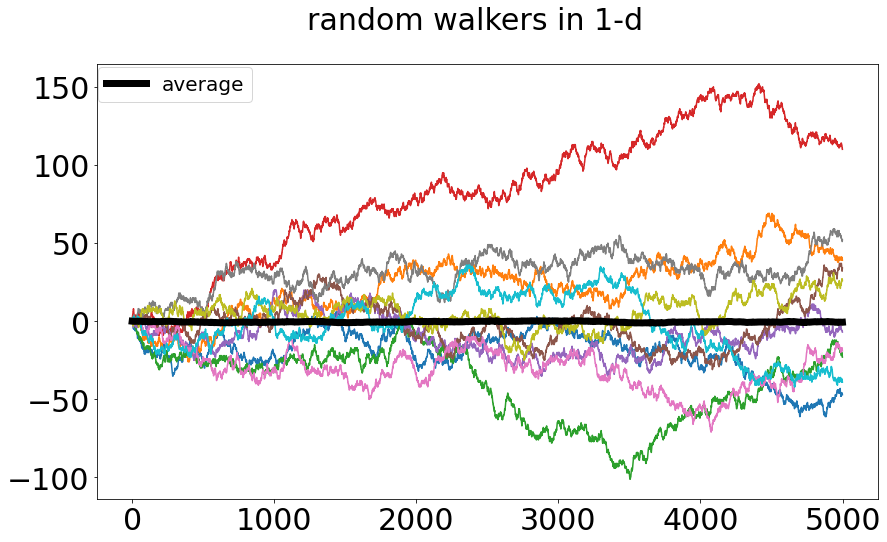

In [274]:
# check the first 10 walkers & average displacement
fig, ax = plt.subplots(1,1,figsize=(14,8))
ax.plot(x1d[:,:10])
ax.plot(tf.math.reduce_mean(tf.cast(x1d,dtype=float),axis=1),color='black',linewidth=7,label='average')
ax.tick_params(axis='both',labelsize=30)
fig.suptitle('random walkers in 1-d',fontsize=30)
fig.legend(loc=(0.11,0.81),fontsize=20)
fig.show()

In [275]:
# Now get the average variance over the walkers
sigma1d =tf.math.sqrt(
    tf.math.reduce_mean(tf.cast(x1d**4,dtype=float),axis=1)
        -
        (tf.math.reduce_mean(tf.cast(x1d**2,dtype=float),axis=1))**2
    )


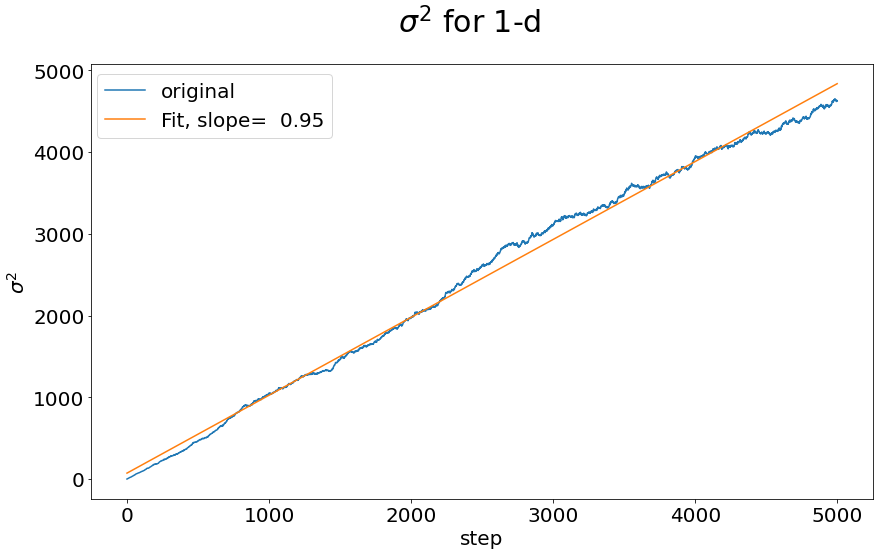

In [300]:
# plot it as a function of n and the fit function
fig, ax = plt.subplots(1,1,figsize=(14,8))
ax.plot(sigma1d,label='original')
res1d = np.polyfit(n,sigma1d,1)
ax.plot(res1d[0]*n+res1d[1],label='Fit, slope=%6.2f' % res1d[0])
fig.suptitle(r'$\sigma^2$ for 1-d',fontsize=30) 
fig.legend(loc=(0.11,0.75),fontsize=20)
ax.tick_params(axis='both',labelsize=20)
ax.set_xlabel("step",fontsize=20)
ax.set_ylabel(r"$\sigma^2$",fontsize=20)
fig.show()

In [282]:
print('linear fit for sigma square: sigma^2 = {0:.2f}*n + {1:.2f}'.format(res1d[0],res1d[1]))

linear fit for sigma square: sigma^2 = 0.95*n + 72.80


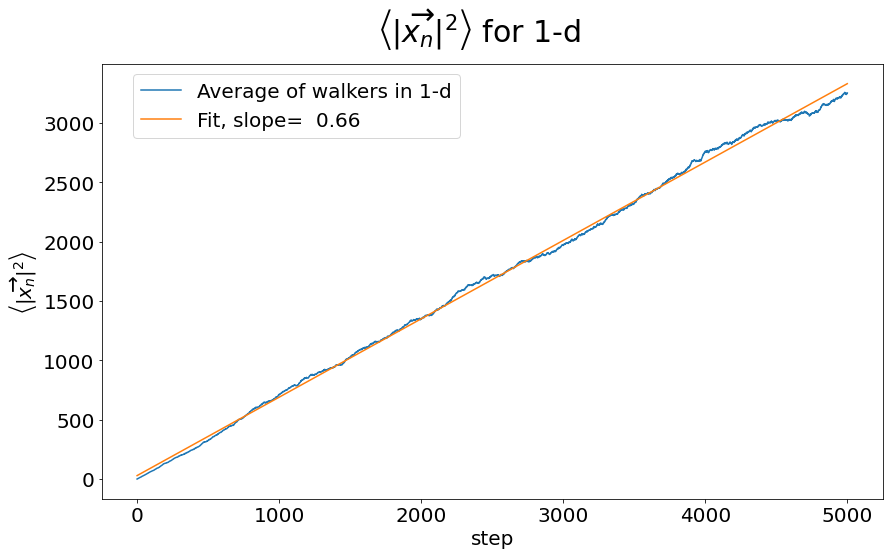

In [298]:
# Plot the mean displacement
fig, ax = plt.subplots(1,1,figsize=(14,8))
x2_1d = tf.math.reduce_mean(tf.cast(x1d**2,dtype=float),axis=1)
ax.plot(x2_1d ,  label='Average of walkers in 1-d' )
x2_1dfit = np.polyfit(n, x2_1d,1 )
ax.plot( n, x2_1dfit[0]*n + x2_1dfit[1], label='Fit, slope=%6.2f' % x2_1dfit[0] )
ax.tick_params(axis='both',labelsize=20)
fig.suptitle(r"$\left< {|\overrightarrow{x_n}|}^2 \right>$ for 1-d",fontsize=30)
ax.set_xlabel("step",fontsize=20)
ax.set_ylabel(r"$\left< {|\overrightarrow{x_n}|}^2 \right>$",fontsize=20)
fig.legend(loc=(0.15,0.75),fontsize=20)
fig.show()

This is due to the three options we have [-1,0,1] for each step.